<center>

# __3. The Aer simulator__

November 21, 2023

<br>

__Herramientas de la Computación Cuántica__

__Máster en Ciencia y Tecnologías de Información Cuántica (MQIST)__

<br>

Diego Alvarez-Estevez, PhD.

_Centro de Investigación en Tecnologías de la Información y las Comunicaciones (CITIC)_

_Universidade da Coruña_

</center>

## 3.0. Introduction to Aer simulators

Until recently it was included as part of the qiskit metapackage. As of Qiskit version 0.44 its installation is optional, contained in the independent ```qiskit-aer``` package:

**pip install qiskit-aer***

_*For this notebook version 0.12.x is recommended: pip install --force-reinstall qiskit-aer==0.12.2_

Aer provides local high-performance quantum computing simulators with realistic noise models.

More information:

<a href=https://qiskit.org/ecosystem/aer/>Qiskit Aer Documentation</a>

<a href=https://github.com/Qiskit/qiskit-aer>GitHub</a>

As with any backend provider (check the <a href=https://qiskit.org/documentation/apidoc/providers.html>Providers Interface</a>), a list of available Aer backends may be obtained by calling the provider's ```backends()``` method:

In [1]:
#from qiskit import Aer
from qiskit_aer import Aer # 1

backend_list = Aer.backends()

print(backend_list)

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), AerSimulator('aer_simulator'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [2]:
# List them individually for better visualization
for backend in backend_list:
    print(type(backend).__name__ + "('" + str(backend) + "')")

AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
AerSimulator('AerSimulator('aer_simulator')')
QasmSimulator('QasmSimulator('qasm_simulator')')
StatevectorSimulator('StatevectorSimulator('statevector_simulator')')
UnitarySimulator('UnitarySimulator('unitary_simulator')')


1. As of Aer 0.11.0 version, the ```qiskit-aer``` Python package has moved to be a self-contained namespace, ```qiskit_aer```. Previously, it shared a namespace with qiskit-terra by being ```qiskit.providers.aer```. This <a href=https://github.com/Qiskit/qiskit-metapackage/issues/559>was problematic for several reasons</a>, and this release moves away from it. For the time being ```import qiskit.providers.aer``` will continue to work and redirect to ```qiskit_aer``` automatically. Imports from the legacy ```qiskit.provider.aer``` namespace will emit a DeprecationWarning in the future. To avoid any potential issues starting with this release, <u>updating all imports from ```qiskit.providers.aer``` to ```qiskit_aer``` and from ```qiskit.Aer``` to ```qiskit_aer.Aer``` is recommended</u>

In [3]:
# Version checking
import qiskit.tools.jupyter

import sys
print(sys.executable)

%qiskit_version_table

/home/jvazquez/miniconda3/envs/basic-quantum/bin/python


Notes:

1. Notice Aer provider does contain the same three BasicAer simulators: ```qasm_simulator```, ```statevector_simulator```, and ```unitary_simulator```. These backends are referred to as <a href=https://qiskit.org/ecosystem/aer/apidocs/aer_provider.html>```legacy```</a>. They can be used analagously as in BasicAer, however the Aer implementations are "faster / more poweful" counterparts.

2. It also includes several other simulators through two additional classes, namely <a href=https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.PulseSimulator.html#qiskit_aer.PulseSimulator>PulseSimulator</a> (though now deprecated and substitud by functionality in Qiskit Dynamics library) and <a href=https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator>AerSimulator</a> (will come back to examine the all the different subtypes later)

Let us take the following circuit as reference, and show how to run the simulation using Aer:

/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


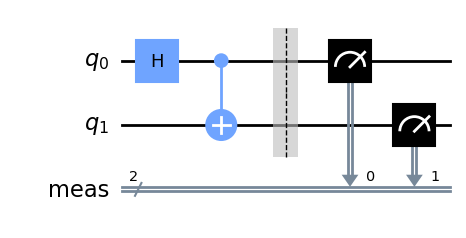

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw("mpl")

In [5]:
from qiskit import transpile 
from qiskit_aer import Aer

backend = Aer.get_backend("qasm_simulator") # Using Aer provider to get qasm_simulator backend

tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)

result = job.result()
counts = result.get_counts(tqc)

# Check results should be equivalent to those obtained with BasicAer
print(counts)

{'11': 505, '00': 495}


<span style="color:red">PRACTICE:</span> Check the returned types for ```backend```, ```job```, and ```result```. Do they match the corresponding BasicAer interfaces?

In [6]:
#print(type(backend))
#print(type(job))
#print(type(result))

In [7]:
# Some observations
# We see that "result" is the same, but (logically) "backend" is not (before it was qiskit.providers.basicaer.qasm_simulator.QasmSimulatorPy) 

# Regarding "job" notice that the returned object is now AerJob and not BasicAerJob.
# However they both inherit from common class JobV1 ("job" -> qiskit.providers.JobV1)

# For "backend":
# "backend" -> qiskit.providers.BackendV1 (for BasicAer) and AerBackend (for qiskit_aer.backends.qasm_simulator.QasmSimulator, check source code)
#             AerBackend inherited from BackendV1 up to version 0.12.2, and from 0.13 from BackendV2:
#             https://qiskit.org/ecosystem/aer/_modules/qiskit_aer/backends/aerbackend.html
#             https://qiskit.org/ecosystem/aer/release_notes.html#release-notes-0-13-0
# Notice as well, by observing "init" method of Aer QasmSimulator source code, that this backend has been marked as "deprecated pending"
# and is superseed by AerSimulator: https://qiskit.org/ecosystem/aer/_modules/qiskit_aer/backends/qasm_simulator.html#QasmSimulator
# We can check the same holds for other "legacy" Aer simulator backends:
# https://qiskit.org/ecosystem/aer/apidocs/aer_provider.html

Similarly, we could obtain an unitary matrix simulation with Aer as follows:

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

#qc.draw("mpl")

backend = Aer.get_backend("unitary_simulator")

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result()
unitary = result.get_unitary(tqc)

array_to_latex(unitary)

<IPython.core.display.Latex object>

## 3.1. Using the AerSimulator backend

AerSimulator is currently the main simulator backend of the Aer provider.

The AerSimulator backend is very versatile, offering many types of _simulation methods_. Each simulation method supports a different set of instructions, the default being "```automatic```". The complete list of simulation methods includes the following:

| Method | Description |
| --- | --- |
| automatic | Default, selects the simulation method automatically based on the circuit and noise model |
| density_matrix | Density matrix simulation that may sample measurement outcomes from noisy circuits with all measurements at the end of the circuit |
| extended_stabilizer | An approximate simulated for Clifford + T circuits based on a state decomposition into ranked-stabilizer state |
| matrix_product_state | A tensor-network statevector simulator that uses a Matrix Product State (MPS) representation for the state |
| stabilizer | An efficient Clifford stabilizer state simulator that can simulate noisy Clifford circuits if all errors in the noise model are also Clifford errors |
| statevector | Statevector simulation that can sample measurement outcomes from ideal circuits with all measurements at end of the circuit. For noisy simulations each shot samples a randomly sampled noisy circuit from the noise model |
| superop | Superoperator matrix simulation of an ideal or noisy circuit. This simulates the superoperator matrix of the circuit itself rather than the evolution of an initial quantum state |
| unitary | Unitary matrix simulation of an ideal circuit. This simulates the unitary matrix of the circuit itself rather than the evolution of an initial quantum state |

### 3.1.1. Using the AerSimulation to hold measurement results (like in ```qasm_simulator```)

In the following example we instantiate the default Aer simulator on a circuit containing measurement instructions:

/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


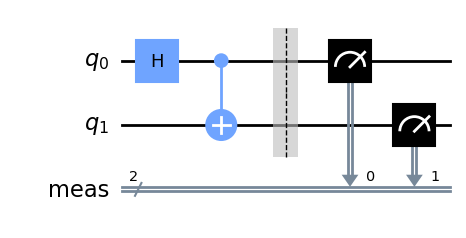

{'11': 525, '00': 475}


In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all() # 1

display(qc.draw("mpl"))

backend = Aer.get_backend("aer_simulator") # 2

tqc = transpile(qc, backend)
# Be careful, possible bugs introduced in Aer 0.13 related to change to BackendV2
# They apparently affect transpilation, among others, influencing resulting simulation method
# It is recommended to use Aer 0.12 for running this notebook
#display(tqc.draw("mpl"))
job = backend.run(tqc, shots=1000)

result = job.result()
counts = result.get_counts(tqc)

print(counts)

Notice that:

1. The circuit will automatically hold measurement results due to the presence of measurement instructions in the circuit. If we comment this line the method ```get_counts()``` will raise an error. <span style="color:red">PRACTICE: </span><span style="color:green">This is basically analogous to behaviour in BasicAer</span>

2. We instantiate the default Aer simulator, meaning the ```automatic``` simulation method will be preset. The actual simulation method will be chosen according to the characteristics of the circuit

<span style="color:red">PRACTICE:</span> Can we recover the actual simulation method that was used by the AerSimulator backend? Tip: examine the fields returned within the ```result``` object

In [10]:
# Check which simulation method was actually used
print(result)
print("\n")
print(result.results[0].metadata['method'])

Result(backend_name='aer_simulator', backend_version='0.13.1', qobj_id='', job_id='54505ae9-d6c1-43a6-b3ec-55d6386ce5ca', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 525, '0x0': 475}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-167', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1363187369, metadata={'time_taken': 0.0011509, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.0003144, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12731, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.0011509)], date=2023-12-1

### 3.1.2. A deeper dive into _simulation methods_ of the AerSimulation backend

<span style="color:red">PRACTICE:</span> Repeat execution of the previous circuit including a T-gate after the CNOT on qubit 1. Examine now the resulting simulation method. What happens? and why?

In [11]:
# Check:
# https://en.wikipedia.org/wiki/Clifford_gates
# https://qiskit.org/documentation/stubs/qiskit.quantum_info.Clifford.html

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.t(1) # non-Cliffort gate
qc.measure_all()

backend = Aer.get_backend("aer_simulator") # automatic simulation method selected

tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)

result = job.result()
counts = result.get_counts(tqc)

print(counts) # Notice difference in #shots with BasicAer "statevector simulator"

# Check which simulation method was actually used
print(result.results[0].metadata['method'])

{'00': 512, '11': 488}
statevector


In [12]:
# Write here your conclusions

So, we noticed that the ```automatic``` simulation method resolved to one more specific according to the characteristics of the circuit.

If wanted, a Aer simulator backend with a preconfigured simulation method can also be obtained using ```Aer.get_backend(name)```. 

You might notice, the correspondence between the list of ```Aer_simulator_*``` backends returned by Aer provider ```backends()``` method, and the available list of _simulation methods_.

We will repeat now the previous simulation but trying to force the use of "stabilizer". What do we expect from this execution? 

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.t(1) # non-Cliffort gate
qc.measure_all()

#backend = Aer.get_backend("aer_simulator") # simulation method automatically selected
backend = Aer.get_backend("aer_simulator_stabilizer") # select "stabilizer" simulation method
#backend = Aer.get_backend("aer_simulator_statevector") # select "statevector" simulation method

tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)

result = job.result()
counts = result.get_counts(tqc)

print(counts)

# Check which simulation method was actually used
print(result.results[0].metadata['method'])

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-171 contains invalid parameters  for "stabilizer" method.


QiskitError: 'Data for experiment "circuit-171" could not be found.'

In [ ]:
# Write here your conclusions

Thus so far we have seen that by default (e.g. with ```Aer.get_backend("aer_simulator")```) the ```automatic``` simulation method option is selected, and that we can change this behaviour by requesting a preconfigured method using the ```Aer.get_backend("aer_simulator_*")``` instruction, matching the corresponding name. 

There are additional possibilities to <u>manually configurate</u> the simulation method. For example, the specific simulation method can also be set using the ```backend.set_options(method=value)``` option.

In addition, the simulation method may be explicitly overridden <u>for a single execution</u> by passing it as keyword to the ```run()``` method.

Let us explore that:

In [14]:
# Method 1: Using backend "set_options"
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1]) # First argument refers to qubits [0,1] to be measured into classical [0,1] respectively (second argument)

backend = Aer.get_backend('aer_simulator') # automatic method is selected

backend.set_options(method='statevector') # Forcing "statevector", otherwise (comment this line) automatic will resolve to "stabilizer"

# Transpile and run
tqc = transpile(qc, backend)
result = backend.run(tqc).result()

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

counts = result.get_counts(tqc)
print(counts)

Simulation method: statevector
{'00': 531, '11': 493}


In [15]:
# Method 2: Obtained preconfigured backend (we have seen this already)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

#backend = Aer.get_backend('aer_simulator_stabilizer')
backend = Aer.get_backend('aer_simulator_statevector')

# Transpile and run
tqc = transpile(qc, backend)
result = backend.run(tqc).result()

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

counts = result.get_counts(tqc)
print(counts)

Simulation method: statevector
{'00': 485, '11': 539}


In [16]:
# Method 3: Override for "one" execution
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = Aer.get_backend('aer_simulator_statevector') # Initiallized to "statevector"

# Transpile and run
tqc = transpile(qc, backend)
result = backend.run(tqc, method="stabilizer").result() # Temporally override to "stabilizer"

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

counts = result.get_counts(tqc)
print(counts)

# Repeat execution to check that initially configured method is used
result = backend.run(tqc).result() # We do not specify any specific method here
print("Simulation method:", result.results[0].metadata['method']) 
counts = result.get_counts(tqc)
print(counts)

Simulation method: stabilizer
{'11': 513, '00': 511}
Simulation method: statevector
{'00': 496, '11': 528}


So, it seems that, at least for some circuits, they would run with different simulation methods. Which one should I then use?

Well, it turns out, when simulating ideal circuits, that changing between the exact simulation methods ```stabilizer```, ```statevector```, ```density_matrix``` and ```matrix_product_state``` should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

Each of these methods determines the internal representation of the quantum circuit and the algorithms used to process the quantum operations. They each have advantages and disadvantages, in terms of speed or scalability, and in this regard choosing the best method is a matter of investigation

Takeaway: in general, unless we have a very good reason to choose a specific method, sticking to the default "automatic" option is usually a reasonable choice:

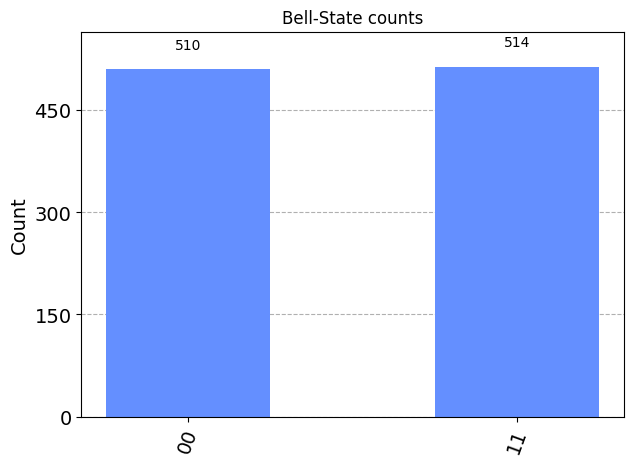

Simulation method: stabilizer


In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator') # automatic simulation method
tqc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(tqc).result()
counts = result.get_counts(tqc)
display(plot_histogram(counts, title='Bell-State counts'))

print("Simulation method:", result.results[0].metadata['method']) 

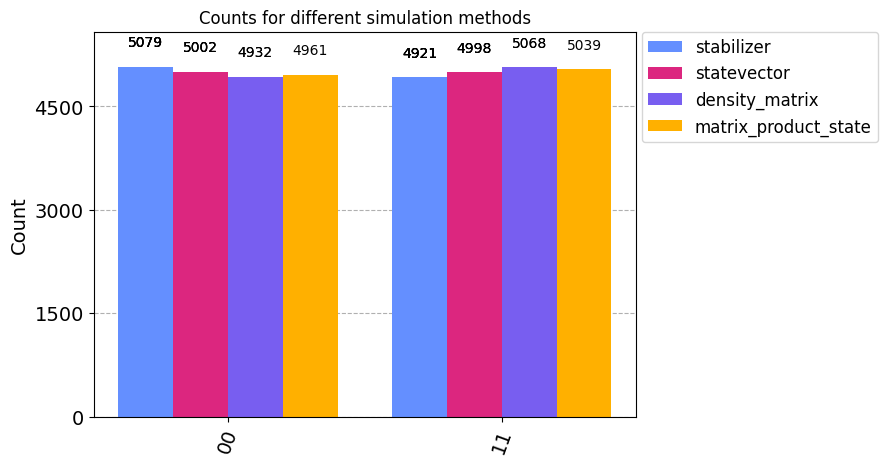

In [18]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(tqc, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(tqc, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(tqc, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(tqc, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

### 3.1.3. Retrieving the output state

<span style="color:red">PRACTICE:</span> Let us consider again the following circuit and try to retrieve the statevector from the results. With BasicAer we were able to do this if using the ```statevector_simulator``` backend, and then calling the ```result.get_statevector(tqc)``` method. What happens in this case with Aer?

In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.t(1) # non-Cliffort gate
qc.measure_all()

#backend = Aer.get_backend("aer_simulator") # "automatic" should resolve to "statevector"
#backend = Aer.get_backend("aer_simulator_stabilizer") # select "stabilizer" simulation method
backend = Aer.get_backend("aer_simulator_statevector") # select "statevector" simulation method

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result()

#print(result)

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

statevector = result.get_statevector(tqc)
array_to_latex(statevector)

Simulation method: statevector


QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fb5542004c0>"'

In [20]:
# Write here your conclusions

Let us see how to command the Aer Simulator to calculate <u>and hold</u> a statevector. 

Run firts the following code, check first that it works. Then we will explore different options:

In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.t(1) # 1
qc.save_statevector() # Need to explicitly specify this
#qc.save_state() # 2
qc.measure_all()

backend = Aer.get_backend("aer_simulator")
#backend = Aer.get_backend("aer_simulator_statevector") # 3

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result()

#print(result)

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

statevector = result.get_statevector(tqc)
array_to_latex(statevector)

Simulation method: statevector


<IPython.core.display.Latex object>

<span style="color:red">PRACTICE:</span>
1. Try commenting the line with the non-Clifford T-gate. Which simulation method "automatic" should resolve to? Are we still able to recover the state vector?
2. What does it happen if using the method "save_state()" instead of "save_statevector()"? Try both with and without the T-gate
3. Lastly, repeat again 2, but now manually setting the simulation method to be "statevector". Does it change the result?

It might be usefult to take a look the following related [documentation](https://qiskit.org/ecosystem/aer/apidocs/aer_library.html#saving-simulator-data)

In [ ]:
# Write here your conclusions

Let us now focus on the "counts" results:

In [22]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#qc.measure_all()
qc.save_statevector()
qc.measure_all()

backend = Aer.get_backend("aer_simulator")
#backend = Aer.get_backend("aer_simulator_statevector")

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result()

#print(result)

# Check counts
counts = result.get_counts()
print(counts)

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

statevector = result.get_statevector(tqc)
array_to_latex(statevector)

{'11': 516, '00': 508}
Simulation method: statevector


<IPython.core.display.Latex object>

We noticed already that even if the simulation method becomes "statevector", we are still able to get #shots (default 1024), which was <u>a difference with behaviour in BasicAer</u>, where with "statevector" simulation became one-shot

On the other hand, if we do not include measurement instruction, (and using "statevector") we are still able to get counts, but then we get a "one-shot" result. This was also the behaviour with BasicAer

And if we keep using "save state" instructions, we will be able to access to the "state vector". However, notice the returned "state vector" will be different if the "save_statevector()" instruction is added before or after measurements: 

If added later, the simulation will output a "collapsed state", otherwise it will save the state "before the collapse". Check it by commenting/uncommenting the proper lines in the code above.

Notice this does not affect to the number of shots obtained if adding measurements (regarless of before/after the "save_statevector()" instruction). For as long as we add measurement instructions we still get "shots-based" simulation (default 1024) 

In [34]:
# Just as a recall, if no "save_statevector" NOR measurements are included, get_counts will raise an error:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#qc.save_statevector() # Uncomment will solve the error
#qc.measure_all() # Unconmment will solve the error

backend = Aer.get_backend("aer_simulator")

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result()

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 

counts = result.get_counts()
print(counts)

Simulation method: stabilizer


QiskitError: 'No counts for experiment "0"'

<span style="color:red">EXERCISE:</span> Run the following code several times. 

-Do we always get the same "collapsed" output state? Why?

-Execute then, also multiple times, the second code block. Do we find a correspondence between the "memorized" execution results and the output "collapsed" state vector?

In [45]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.save_statevector()
#qc.measure_all()

backend = Aer.get_backend("aer_simulator")

tqc = transpile(qc, backend)
job = backend.run(tqc, shots=10)

result = job.result()
counts = result.get_counts()
statevector = result.get_statevector(tqc)

# Check which simulation method was actually used
print("Simulation method:", result.results[0].metadata['method']) 
print(counts)
array_to_latex(statevector)

Simulation method: statevector
{'11': 4, '00': 6}


<IPython.core.display.Latex object>

In [40]:
# Now try this, we can recover all the individual results
result = backend.run(tqc, shots=10, memory=True).result()
memory = result.get_memory(tqc)
print("Simulation method:", result.results[0].metadata['method']) 
print(memory)
#print(result.data())
array_to_latex(result.get_statevector())

Simulation method: statevector
['11', '11', '00', '11', '11', '00', '11', '00', '00', '11']


<IPython.core.display.Latex object>

--------------------- MY SOLUTION ---------------------

In the first code block the statevector that we get oscilates between $|00\rangle$ and $|11\rangle$. This is due to the fact that each time we execute, only the result of the last shot of the circuit is saved into the state vector. Sometimes the result is $|00\rangle$ and sometimes is $|11\rangle$, with $0.5$ probability.

In the second block we see this perfectly. The last measured obtain in the simulation always corresponds with the statevector that we get, precisely because the statevector stored if the method `save_statevector` is used after the measurementes always corresponds with the collapsed state of the last shot, as we said before.

### 3.1.4. Other Aer simulation options

The AerSimulator backend supports a variety of configurable options which can be updated using the ```set_options``` method. 

One of the available simulator options allows setting the float precision for the ```statevector```, ```density_matrix```, ```unitary``` and ```superop``` methods. This is done using the ```set_precision="single"``` or ```precision="double"``` (default) option:

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.save_statevector()

# Configure statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
tqc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(tqc, precision="single").result() # Singlel precision
print(result.get_statevector())

# Run and get counts
result = simulator.run(tqc, precision="double").result() # Default double precision
print(result.get_statevector())

Single precision will halve the required memory and may provide performance improvements on certain systems. 

Check the AerSimulator <a href=https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html>API documentation</a> for additional details and configuration options

It is also worth taking a look to other options, like running in GPU, saving multiple states, or setting the simulator to custom states, available in the following [Aer tutorial](https://qiskit.org/ecosystem/aer/tutorials/1_aer_provider.html#Setting-the-simulator-to-a-custom-state)

<span style="color:red">EXERCISE:</span> Explore the following two additional tutorials about the [Extended Stabilizer](https://qiskit.org/ecosystem/aer/tutorials/6_extended_stabilizer_tutorial.html) and [Matrix Product State](https://qiskit.org/ecosystem/aer/tutorials/7_matrix_product_state_method.html) simulation methods.

--------------------- MY SOLUTION ---------------------

#### Extended Stabilizer

The great thing about this method is that can simulate large circuits (up to 63 qubits). 

In [47]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

import random

circ = QuantumCircuit(40, 40)

# Initialize with a Hadamard layer
circ.h(range(40))
# Apply some random CNOT and T gates
qubit_indices = [i for i in range(40)]
for i in range(10):
    control, target, t = random.sample(qubit_indices, 3)
    circ.cx(control, target)
    circ.t(t)
circ.measure(range(40), range(40))

# Create extended stabilizer method simulator
extended_stabilizer_simulator = AerSimulator(method='extended_stabilizer')

# Transpile circuit for backend
tcirc = transpile(circ, extended_stabilizer_simulator)

extended_stabilizer_result = extended_stabilizer_simulator.run(tcirc, shots=1).result()
print('This succeeded?: {}'.format(extended_stabilizer_result.success))

This succeeded?: True


But, the decompositions that it uses are approximate. For example, if we used statevector simulator we would get slightly different results, but we can control the error with the `extended_stabilizer_approximation_error` option (default is 0.05). It takes more time. There are also other options like `extended_stabilizer_mixing_time`, which can be used if you expect your circuit output to be concentrated on just a few output states, or `extended_stabilizer_measure_sampling` , if your circuit has some non-zero probability on all amplitudes (e.g. if it’s a random circuit).

So, to sum up, if you have smaller circuits with lots of non-Clifford gates, then the statevector method will likely perform better than the extended stabilizer. If however you want to look at circuits on many qubits, without needing access to high performance computation, then this simulator may be the way to go.

100 shots in 2.658268928527832s


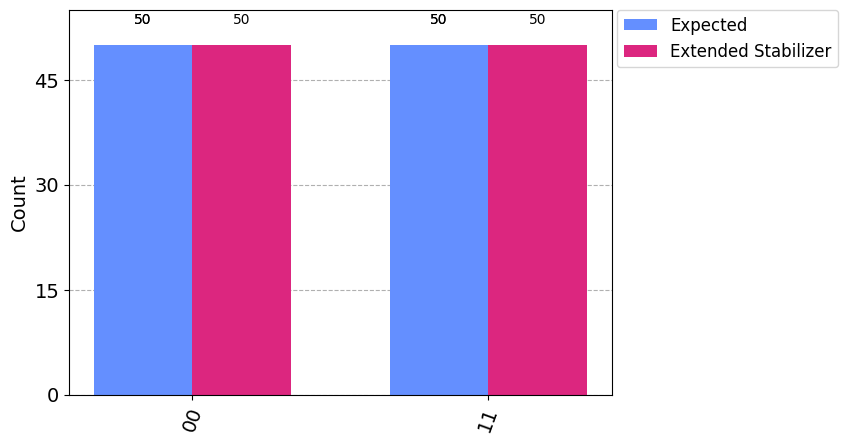

In [49]:
small_circ = QuantumCircuit(2, 2)
small_circ.h(0)
small_circ.cx(0, 1)
small_circ.t(0)
small_circ.measure([0, 1], [0, 1])
# This circuit should give 00 or 11 with equal probability...
expected_results ={'00': 50, '11': 50}

tsmall_circ = transpile(small_circ, extended_stabilizer_simulator)
opts = {'extended_stabilizer_approximation_error': 0.03}

result = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100, **opts).result()
counts = result.get_counts(0)
print('100 shots in {}s'.format(result.time_taken))

plot_histogram([expected_results, counts],
               legend=['Expected', 'Extended Stabilizer'])

#### Matrix Product State (MPS)

MPS offers a local representation of a quantum state, allowing for more efficient operations in quantum circuits with fewer two-qubit gates. The MPS representation can simplify the exponential complexity involved in state vector representations of quantum systems, particularly when dealing with quantum gates that operate on consecutive qubits.

In the worst case, the tensors may grow exponentially. However, the size of the overall structure remains ‘small’ for circuits that do not have ‘many’ two-qubit gates. This allows much more efficient operations in circuits with relatively ‘low’ entanglement.

In [50]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Construct quantum circuit
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0,1], [0,1])

# Select the AerSimulator from the Aer provider
simulator = AerSimulator(method='matrix_product_state')

# Run and get counts, using the matrix_product_state method
tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
counts = result.get_counts(0)
counts

{'11': 514, '00': 510}

To return the full internal MPS structure we can also use the `save_matrix_product_state` instruction and also the statevector can be saved with the usual `save_statevector` method (although this has an exponential time cost).

In [52]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)

# Define a snapshot that shows the current state vector
circ.save_statevector(label='my_sv')
circ.save_matrix_product_state(label='my_mps')
circ.measure([0,1], [0,1])

# Execute and get saved data
tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
data = result.data(0)

#print the result data
data

{'counts': {'0x3': 508, '0x0': 516},
 'my_sv': Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j],
             dims=(2, 2)),
 'my_mps': ([(array([[1.-0.j, 0.-0.j]]), array([[0.-0.j, 1.-0.j]])),
   (array([[1.-0.j],
           [0.-0.j]]),
    array([[0.-0.j],
           [1.-0.j]]))],
  [array([0.70710678, 0.70710678])])}

We can benefit if we only do operations that don’t require printing the full state vector. For example, if we run a circuit and then take measurement. The circuit below has 200 qubits. We create an EPR state involving all these qubits. Although this state is highly entangled, it is handled well by the matrix product state method, because there are effectively only two states.

In [53]:
num_qubits = 50
circ = QuantumCircuit(num_qubits, num_qubits)

# Create EPR state
circ.h(0)
for i in range (0, num_qubits-1):
    circ.cx(i, i+1)

# Measure
circ.measure(range(num_qubits), range(num_qubits))

tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
print("Time taken: {} sec".format(result.time_taken))
result.get_counts()

Time taken: 0.07596516609191895 sec


{'00000000000000000000000000000000000000000000000000': 542,
 '11111111111111111111111111111111111111111111111111': 482}